# Projeto 06 - Safra 😎

| Coluna            | Tipo da variável                   |                                           Descrição |
| :---------------- | :--------------------------------- | --------------------------------------------------: |
| LoanNr_ChkDgt     | Quantitativa Discreta              |                              Identifier Primary key |
| Name              | Qualitativa Nominal                |                                       Borrower name |
| City              | Qualitativa Nominal                |                                       Borrower city |
| State             | Qualitativa Nominal                |                                      Borrower state |
| Zip               | Qualitativa Nominal                |                                   Borrower zip code |
| Bank              | Qualitativa Nominal                |                                           Bank name |
| BankState         | Qualitativa Nominal                |                                          Bank state |
| NAICS             | Qualitativa Ordinal                |  North American industry classification system code |
| ApprovalDate      | Qualitativa Ordinal                |                          Date SBA commitment issued |
| ApprovalFY        | Quantitativa Discreta              |                           Fiscal year of commitment |
| Term              | Quantitativa Discreta              |                                 Loan term in months |
| NoEmp             | Quantitativa Discreta              |                        Number of business employees |
| NewExist          | Qualitativa Nominal                |             1 = Existing business, 2 = New business |
| CreateJob         | Quantitativa Discreta              |                              Number of jobs created |
| RetainedJob       | Quantitativa Discreta              |                             Number of jobs retained |
| FranchiseCode     | Qualitativa Nominal                |     Franchise code, (00000 or 00001) = No franchise |
| UrbanRural        | Qualitativa Nominal                |                 1 = Urban, 2 = rural, 0 = undefined |
| RevLineCr         | Qualitativa Nominal                |           Revolving line of credit: Y = Yes, N = No |
| LowDoc            | Qualitativa Nominal                |                LowDoc Loan Program: Y = Yes, N = No |
| ChgOffDate        | Qualitativa Ordinal                |   The date when a loan is declared to be in default |
| DisbursementDate  | Qualitativa Ordinal                |                                   Disbursement date |
| DisbursementGross | Quantitativa Contínua              |                                    Amount disbursed |
| BalanceGross      | Quantitativa Contínua              |                            Gross amount outstanding |
| MIS_Status        | Qualitativa Nominal                | Loan status charged off = CHGOFF, Paid in full =PIF |
| ChgOffPrinGr      | Quantitativa Contínua              |                                  Charged-off amount |
| GrAppv            | Quantitativa Contínua              |               Gross amount of loan approved by bank |
| SBA_Appv          | Quantitativa Contínua              |            SBA’s guaranteed amount of approved loan |


| Coluna            | Tipo da variável                   |                                           Descrição | Check |
| :---------------- | :--------------------------------- | --------------------------------------------------: |:-----:| 
| Name              | Qualitativa Nominal                |                                       Borrower name |[ ]    |
| City              | Qualitativa Nominal                |                                       Borrower city |[ ]    |
| State             | Qualitativa Nominal                |                                      Borrower state |[ ]    |
| Bank              | Qualitativa Nominal                |                                           Bank name |[ ]    | 
| NAICS             | Qualitativa Ordinal                |  North American industry classification system code |[ ]    |
| ApprovalDate      | Qualitativa Ordinal                |                          Date SBA commitment issued |[ ]    |
| NewExist          | Qualitativa Nominal                |             1 = Existing business, 2 = New business |[ ]    |
| UrbanRural        | Qualitativa Nominal                |                 1 = Urban, 2 = rural, 0 = undefined |[ ]    |
| RevLineCr         | Qualitativa Nominal                |           Revolving line of credit: Y = Yes, N = No |[ ]    |
| LowDoc            | Qualitativa Nominal                |                LowDoc Loan Program: Y = Yes, N = No |[ ]    |
| ChgOffDate        | Qualitativa Ordinal                |   The date when a loan is declared to be in default |[ ]    |
| MIS_Status        | Qualitativa Nominal                | Loan status charged off = CHGOFF, Paid in full =PIF |[ ]    |
| DisbursementDate  | Qualitativa Ordinal                |                                   Disbursement date |[ ]    |
| DisbursementGross | Quantitativa Contínua              |                                    Amount disbursed |[ ]    |
| BalanceGross      | Quantitativa Contínua              |                            Gross amount outstanding |[ ]    |
| ApprovalFY        | Quantitativa Discreta              |                           Fiscal year of commitment |[ ]    |
| Term              | Quantitativa Discreta              |                                 Loan term in months |[ ]    |
| NoEmp             | Quantitativa Discreta              |                        Number of business employees |[ ]    |
| ChgOffPrinGr      | Quantitativa Contínua              |                                  Charged-off amount |[ ]    |
| GrAppv            | Quantitativa Contínua              |               Gross amount of loan approved by bank |[ ]    |
| SBA_Appv          | Quantitativa Contínua              |            SBA’s guaranteed amount of approved loan |[ ]    |

'Name', 'City', 'State', 'Bank', 'NAICS', 'ApprovalDate', 'ApprovalFY',
       'Term', 'NoEmp', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [4]:
df_raw = pd.read_csv("SBAnational.csv")
df_raw.head()

FileNotFoundError: [Errno 2] No such file or directory: 'SBAnational.csv'

In [ ]:
df_raw.info()

## Tratamento dos dados

In [ ]:
df_raw.isna().sum()

In [ ]:
df_raw.dropna(subset=["Name", "City", "State", "Bank", "BankState", "NewExist", "RevLineCr", "LowDoc", "DisbursementDate", "MIS_Status"], inplace=True)

In [ ]:
## drop columns:
df_raw.drop(columns=["CreateJob", "RetainedJob", "FranchiseCode", "Zip", "BankState", "LoanNr_ChkDgt"], inplace=True)

#  "ApprovalDate", "ApprovalFY", "Term", "NoEmp", "DisbursementGross", "BalanceGross", "GrAppv", "SBA_Appv", "NAICS", "ApprovalDate", "ChgOffDate", "DisbursementDate"]

In [ ]:
df_raw.isna().sum()

In [ ]:
df_raw.columns

In [ ]:
money_type_columns = ["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]
for col in money_type_columns:
    df_raw[col] = df_raw[col].apply(lambda x: x.replace("$", "").replace(",", "")).astype(float)

In [ ]:
df_raw["ApprovalDate"] = pd.to_datetime(df_raw["ApprovalDate"])
df_raw["DisbursementDate"] = pd.to_datetime(df_raw["DisbursementDate"])

In [ ]:
df_raw = df_raw[df_raw["LowDoc"].isin(("Y", "N"))]
df_raw = df_raw[df_raw["RevLineCr"].isin(("Y", "N"))]

In [ ]:
df_raw["ApprovalFY"].replace("1976A", 1976, inplace=True)
df_raw["ApprovalFY"] = df_raw["ApprovalFY"].astype(int)

In [ ]:
df_raw["NewExist"] = df_raw["NewExist"].astype(int)

## Variáveis Qualitativas // Categorical

| Coluna            | Tipo da variável                   |                                           Descrição |
| :---------------- | :--------------------------------- | --------------------------------------------------: |
| Name              | Qualitativa Nominal                |                                       Borrower name |
| City              | Qualitativa Nominal                |                                       Borrower city |
| State             | Qualitativa Nominal                |                                      Borrower state |
| Bank              | Qualitativa Nominal                |                                           Bank name |
| NAICS             | Qualitativa Ordinal                |  North American industry classification system code |
| ApprovalDate      | Qualitativa Ordinal                |                          Date SBA commitment issued |
| NewExist          | Qualitativa Nominal                |             1 = Existing business, 2 = New business |
| UrbanRural        | Qualitativa Nominal                |                 1 = Urban, 2 = rural, 0 = undefined |
| RevLineCr         | Qualitativa Nominal                |           Revolving line of credit: Y = Yes, N = No |
| LowDoc            | Qualitativa Nominal                |                LowDoc Loan Program: Y = Yes, N = No |
| ChgOffDate        | Qualitativa Ordinal                |   The date when a loan is declared to be in default |
| MIS_Status        | Qualitativa Nominal                | Loan status charged off = CHGOFF, Paid in full =PIF |
| DisbursementDate  | Qualitativa Ordinal                |                                   Disbursement date |

In [ ]:
# groupby values more frequent grouped by 'city'
city_group = df_raw.groupby("City").size().sort_values(ascending=False)

#plot an bar chart
city_group.head(10).plot(kind="bar", figsize=(10, 5), title="Top 10 cities with more loans")

In [ ]:
# plot a mean of loan amount by city
city_group = df_raw.groupby("City")["DisbursementGross"].mean().sort_values(ascending=False)
city_group.head(10).plot(kind="bar", figsize=(10, 5), title="")

In [ ]:
categorical_columns = ["State", "RevLineCr", "LowDoc", "NewExist", "MIS_Status"]

fig, axs = plt.subplots(3, 2, figsize=(15, 10))

for col, ax in zip(categorical_columns, axs.flatten()):
    # print(col, ax)
    # plt.
    df_raw[col].value_counts().plot(kind="bar", title=col, ax=ax)
    # df_tmp = df_raw[col].value_counts().reset_index()
    # ax.bar(x=df_tmp["index"], height=df_tmp[col])
    # print(df_raw[col].value_counts())
    plt.xticks(rotation = 45)
plt.tight_layout()


## Variáveis Quantitativas

| Coluna            | Tipo da variável                   |                                           Descrição |
| :---------------- | :--------------------------------- | --------------------------------------------------: |
| GrAppv            | Quantitativa Contínua              |               Gross amount of loan approved by bank |
| DisbursementGross | Quantitativa Contínua              |                                    Amount disbursed |
| BalanceGross      | Quantitativa Contínua              |                            Gross amount outstanding |
| ApprovalFY        | Quantitativa Discreta              |                           Fiscal year of commitment |
| Term              | Quantitativa Discreta              |                                 Loan term in months |
| NoEmp             | Quantitativa Discreta              |                        Number of business employees |
| ChgOffPrinGr      | Quantitativa Contínua              |                                  Charged-off amount |
| SBA_Appv          | Quantitativa Contínua              |            SBA’s guaranteed amount of approved loan |




##  Iremos analisar de uma maneira completa as variáveis GrAppv, DisbursementGross, Term, NoEmp

| Coluna            | Tipo da variável                   |                                           Descrição |
| :---------------- | :--------------------------------- | --------------------------------------------------: |
| GrAppv            | Quantitativa Contínua              |               Gross amount of loan approved by bank |
| DisbursementGross | Quantitativa Contínua              |                                    Amount disbursed |
| Term              | Quantitativa Discreta              |                                 Loan term in months |
| NoEmp             | Quantitativa Discreta              |                        Number of business employees |


In [ ]:
# Create a function that appends to the new dataset all the items in describe() for each column in df_raw 
def describe_columns(df, colunas):
    df_describe = pd.DataFrame()
    for col in df.columns:
        if col in colunas:
            df_describe[col] = df[col].describe()
    return df_describe

cols = ["DisbursementGross", "GrAppv", "Term", "NoEmp"]
df_medidas_de_resumo = describe_columns(df_raw, cols)
display(df_medidas_de_resumo[cols])

### GrAppv
- [X] Medidas de Resumo
- [X] Maiores frequências e distribuição
- [X] Outliers e dizer a decisão
- [X] Gráfico


In [ ]:
# Medidas de Resumo

print(f'Medidas de resumo\n{df_raw["GrAppv"].describe()}')
print(f'\nMaiores frequências\n{df_raw["GrAppv"].value_counts().head(5)}')

In [ ]:
# Boxplot da coluna GrAppv
GrAppv = df_raw["GrAppv"]
boxplot = GrAppv.plot(kind="box", figsize=(10, 5))

In [ ]:
# Notamos que há vários outliers e criamos uma função que dividirá os valores em 2 grupos; o primeiro até a chamada linha de corte
#  e o segundo após a linha de corte (outliers superiores)

def interquartile(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75) 
    iqr = q3 - q1
    return (q3 + 1.5 * iqr)



In [ ]:
linha_de_corte = interquartile(GrAppv)
print(linha_de_corte)


In [ ]:
Dividas_ate_linhadecorte = GrAppv[GrAppv < linha_de_corte]
Dividas_ate_linhadecorte.describe()

In [ ]:
boxplot = Dividas_ate_linhadecorte.plot(kind="box", figsize=(10, 5))

In [ ]:
Dividas_apos_linhadecorte = GrAppv[GrAppv > linha_de_corte]
Dividas_apos_linhadecorte.describe()

In [ ]:
boxplot = Dividas_apos_linhadecorte.plot(kind="box", figsize=(10, 5))

In [ ]:
## Plot two histograms, one with linha_de_corte and other without
plot_1 = GrAppv[GrAppv < linha_de_corte].hist(bins=15, figsize=(10, 5), label="Sem linha_de_corte")
plt.ylabel("Frequência")
plt.xlabel("Crédito concedido")
plt.title(f'Valores até ${linha_de_corte:.0f}')

In [ ]:
# histogram the GrAppv column filtering by GrAppv 
GrAppvPlot = GrAppv[GrAppv > linha_de_corte].hist(bins=15, figsize=(10, 5))
plt.ylabel("Frequência")
plt. xlabel("Crédito concedido")
plt.title(f'Valores maiores que ${linha_de_corte:.0f}')

### DisbursementGross
- [X] Medidas de Resumo
- [X] Maiores frequências e distribuição
- [X] Outliers e dizer a decisão
- [X] Gráfico

In [ ]:
# Medidas de Resumo

print(f'Medidas de resumo\n{df_raw["DisbursementGross"].describe()}')
print(f'\nMaiores frequências\n{df_raw["DisbursementGross"].value_counts().head(5)}')

In [ ]:
# Boxplot da coluna DisbursementGross
DisbursementGross = df_raw["DisbursementGross"]
boxplot = DisbursementGross.plot(kind="box", figsize=(10, 5))

In [ ]:
# Notamos que há vários outliers e criamos uma função que dividirá os valores em 2 grupos; o primeiro até a chamada linha de corte
#  e o segundo após a linha de corte (outliers superiores)

def interquartile(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75) 
    iqr = q3 - q1
    return (q3 + 1.5 * iqr)

In [ ]:
linha_de_corte = interquartile(DisbursementGross)
print(linha_de_corte)


In [ ]:
Dividas_ate_linhadecorte = DisbursementGross[DisbursementGross < linha_de_corte]
Dividas_ate_linhadecorte.describe()

In [ ]:
boxplot = Dividas_ate_linhadecorte.plot(kind="box", figsize=(10, 5))

In [ ]:
Dividas_apos_linhadecorte = DisbursementGross[DisbursementGross > linha_de_corte]
Dividas_apos_linhadecorte.describe()

In [ ]:
boxplot = Dividas_apos_linhadecorte.plot(kind="box", figsize=(10, 5))

In [ ]:
## Plot two histograms, one with linha_de_corte and other without
plot_1 = DisbursementGross[DisbursementGross < linha_de_corte].hist(bins=15, figsize=(10, 5), label="Sem linha_de_corte")
plt.ylabel("Frequência")
plt.xlabel("Crédito concedido")
plt.title(f'Valores até ${linha_de_corte:.0f}')

In [ ]:
# histogram the DisbursementGross column filtering by DisbursementGross 
DisbursementGrossPlot = DisbursementGross[DisbursementGross > linha_de_corte].hist(bins=15, figsize=(10, 5))
plt.ylabel("Frequência")
plt.xlabel("Crédito concedido")
plt.title(f'Valores maiores que ${linha_de_corte:.0f}')

### Term
- [X] Medidas de Resumo
- [X] Maiores frequências e distribuição
- [X] Outliers e dizer a decisão
- [X] Gráfico

In [ ]:
# Medidas de Resumo

print(f'Medidas de resumo\n{df_raw["Term"].describe()}')
print(f'\nMaiores frequências\n{df_raw["Term"].value_counts().head(5)}')

Medidas de resumo
count    611140.000000
mean        105.200825
std          75.587488
min           0.000000
25%          60.000000
50%          84.000000
75%         120.000000
max         527.000000
Name: Term, dtype: float64

Maiores frequências
84     170797
240     60543
60      58517
120     43152
300     21683
Name: Term, dtype: int64


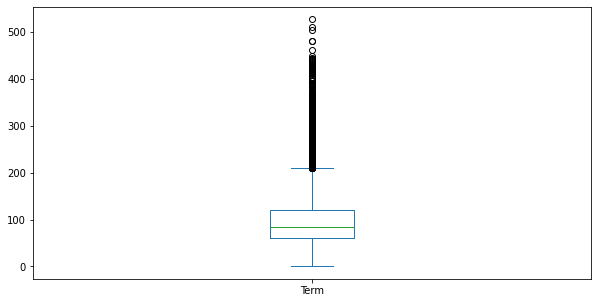

In [ ]:
# Boxplot da coluna Term, optamos por não remover pois há empréstimos com um número maior de meses, o que não deve ser descartado.
Term = df_raw["Term"]
boxplot = Term.plot(kind="box", figsize=(10, 5))

Text(0.5, 0, 'Quantidade de meses para pagamento')

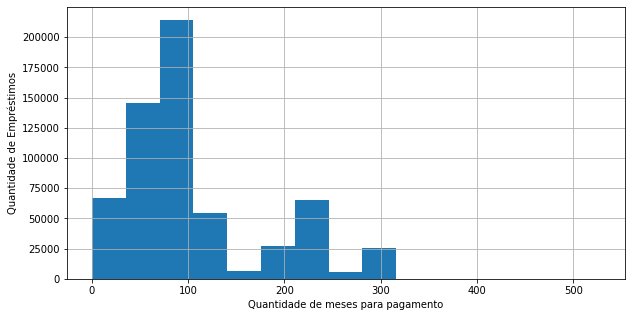

In [ ]:
TermPlot = Term.hist(bins=15, figsize=(10, 5))
plt.ylabel("Quantidade de Empréstimos")
plt.xlabel("Quantidade de meses para pagamento")


### NoEmp
- [X] Medidas de Resumo
- [X] Maiores frequências e distribuição
- [X] Outliers e dizer a decisão
- [X] Gráfico

In [ ]:
# Medidas de Resumo

print(f'Medidas de resumo\n{df_raw["NoEmp"].describe()}')
print(f'\nMaiores frequências\n{df_raw["NoEmp"].value_counts().head(10)}')

Medidas de resumo
count    611140.000000
mean         11.993357
std          75.656806
min           0.000000
25%           2.000000
50%           4.000000
75%          11.000000
max        9999.000000
Name: NoEmp, dtype: float64

Maiores frequências
1     101961
2      91237
3      60276
4      49355
5      40543
6      30701
7      21290
8      21188
10     21066
12     14104
Name: NoEmp, dtype: int64


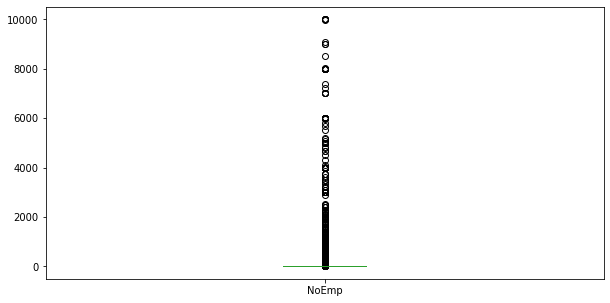

In [ ]:
# Boxplot da coluna NoEmp
NoEmp = df_raw["NoEmp"]
boxplot = NoEmp.plot(kind="box", figsize=(10, 5))

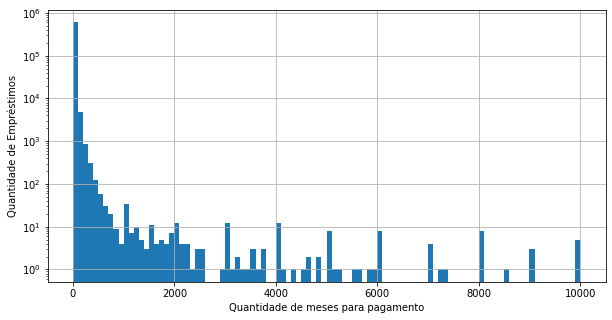

In [ ]:
# Optamos por não retirar os outliers pois realmente existem empresas com grande número de funcionários
#  (sendo o maior valor 9999 - coerente para uma empresa de médio/grande porte), aplicamos a escala logaritmica no eixo Y para melhor visualização.
NoEmpPlot = NoEmp.hist(bins=100, figsize=(10, 5))
plt.ylabel("Quantidade de Empréstimos")
plt.xlabel("Quantidade de meses para pagamento")
plt.yscale('log')

In [ ]:
df_corr = df_raw[['GrAppv', 'DisbursementGross', 'Term', 'NoEmp']].corr()
df_corr

,GrAppv,DisbursementGross,Term,NoEmp
GrAppv,1.000000,0.956657,0.464588,0.102615
DisbursementGross,0.956657,1.000000,0.411542,0.098364
Term,0.464588,0.411542,1.000000,0.056871
NoEmp,0.102615,0.098364,0.056871,1.000000


<AxesSubplot:>

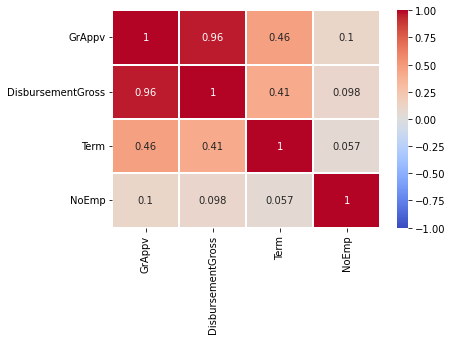

In [ ]:
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap='coolwarm', center=None, robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=0.1, linecolor='white') 

## Parte 2

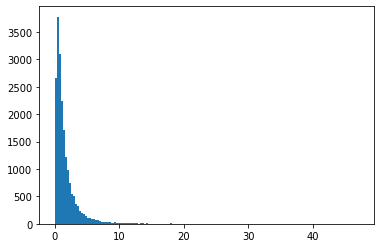

In [123]:
valores = np.load('values_squad4.npy')
plt.hist(valores,bins=150);

### Não aparenta ser normal mas faremos o teste

[0.45507489 0.53549332 6.0893318  ... 1.08672138 0.05897816 0.31222353]


20000

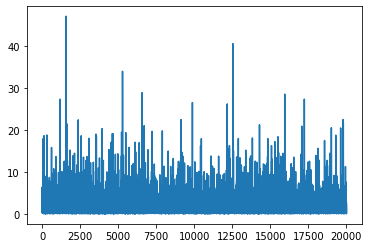

In [124]:
# Cálculo da média e desvio padrão da AMOSTRA
media = np.mean(valores)
S = np.std(valores)
print(valores)
plt.plot(valores)
len(valores)


### TESTE DA DISTRIBUIÇÃO NORMAL

In [125]:
#Criando uma normal com a média e desvio da amostra (define um objeto)
normal_dados = stats.norm(loc = media, scale=S)


In [196]:
k = 150
eixo_x = np.linspace(np.min(valores),10,k)
# Criando um array com 150 caras do eixo x divididos igualmente entre os valores máximo e mínimo
# que será posteriormente usado com a média e desvio padrão da amostra para gerar a normal.

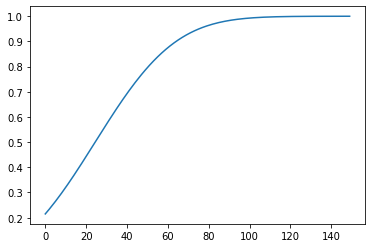

In [198]:
# valores acumulados
prob_acumulada = normal_dados.cdf(eixo_x)
plt.plot(prob_acumulada)

In [199]:
#Calculando a diferença entre 2 pontos da probabilidade acumulada, o que resulta na probabilidade daquele bin
area_bins = prob_acumulada[1:] - prob_acumulada[:-1]


In [200]:
quant_obs_naquele_bin = area_bins * len(valores)
print(quant_obs_naquele_bin)
len(quant_obs_naquele_bin)


[1.91358210e+02 1.96102188e+02 2.00753669e+02 2.05300617e+02
 2.09731050e+02 2.14033088e+02 2.18195012e+02 2.22205308e+02
 2.26052728e+02 2.29726337e+02 2.33215567e+02 2.36510265e+02
 2.39600747e+02 2.42477838e+02 2.45132924e+02 2.47557993e+02
 2.49745673e+02 2.51689272e+02 2.53382809e+02 2.54821051e+02
 2.55999531e+02 2.56914578e+02 2.57563335e+02 2.57943770e+02
 2.58054691e+02 2.57895750e+02 2.57467445e+02 2.56771120e+02
 2.55808951e+02 2.54583945e+02 2.53099915e+02 2.51361464e+02
 2.49373964e+02 2.47143522e+02 2.44676954e+02 2.41981750e+02
 2.39066031e+02 2.35938515e+02 2.32608470e+02 2.29085667e+02
 2.25380338e+02 2.21503118e+02 2.17465002e+02 2.13277291e+02
 2.08951537e+02 2.04499493e+02 1.99933061e+02 1.95264235e+02
 1.90505056e+02 1.85667556e+02 1.80763710e+02 1.75805390e+02
 1.70804314e+02 1.65772008e+02 1.60719758e+02 1.55658577e+02
 1.50599162e+02 1.45551862e+02 1.40526648e+02 1.35533084e+02
 1.30580301e+02 1.25676976e+02 1.20831312e+02 1.16051023e+02
 1.11343320e+02 1.067149

149

In [201]:
hist, bins = np.histogram(valores, bins=eixo_x)
# inserindo os valores da nossa amostra (eixo y) no intervalo proposto anteriormente (eixo x)


In [202]:
# Como há valores esperados nulos, optamos em adicionar um valor desprezível.
# https://stats.stackexchange.com/questions/78101/chi-squared-test-with-0-expected-values

# Perguntar ao prof...

chi_amostra = np.sum((quant_obs_naquele_bin - hist)**2/(quant_obs_naquele_bin + 10**-10))
chi_amostra

21564.637930570476

In [165]:
# Perguntar ao prof....
chi_critico = stats.chi2.ppf(0.95,df=k-2-1)
chi_critico

176.29382259957035

In [163]:
if chi_amostra > chi_critico:
  print(f'Hipótese nula rejeitada pois chi_amostra ({chi_amostra}) > chi_critico ({chi_critico})')
else:
  print(f'Hipótese nula não rejeitada pois chi_amostra ({chi_amostra}) < chi_critico ({chi_critico})')

Hipótese nula rejeitada pois chi_amostra (890175923589.3203) > chi_critico (176.29382259957035)


## Teste Exponencial

In [181]:
#Criando uma normal com a média e desvio da amostra (define um objeto)
exp_dados = stats.expon(loc = media, scale=S)

In [182]:
k = 150
eixo_x = np.linspace(np.min(valores),np.max(valores),k)
# Criando um array com 150 caras do eixo x divididos igualmente entre os valores máximo e mínimo
# que será posteriormente usado com a média e desvio padrão da amostra para gerar a normal.

In [ ]:
# valores acumulados
prob_acumulada = exp_dados.cdf(eixo_x)
plt.plot(prob_acumulada)

In [184]:
#Calculando a diferença entre 2 pontos da probabilidade acumulada, o que resulta na probabilidade daquele bin
area_bins = prob_acumulada[1:] - prob_acumulada[:-1]


In [ ]:
quant_obs_naquele_bin = area_bins * len(valores)
print(quant_obs_naquele_bin)
len(quant_obs_naquele_bin)

In [186]:
hist, bins = np.histogram(valores, bins=eixo_x)
# inserindo os valores da nossa amostra (eixo y) no intervalo proposto anteriormente (eixo x)

In [189]:
# Como há valores esperados nulos, optamos em adicionar um valor desprezível.
# https://stats.stackexchange.com/questions/78101/chi-squared-test-with-0-expected-values

# Perguntar ao prof...

chi_amostra = np.sum((quant_obs_naquele_bin - hist)**2/(quant_obs_naquele_bin + 10**-10))
chi_amostra

3.924188500011381e+17

In [179]:
# Perguntar ao prof....
chi_critico = stats.chi2.ppf(0.95,df=k-2-1)
chi_critico

176.29382259957035

In [203]:
if chi_amostra > chi_critico:
  print(f'Hipótese nula rejeitada pois chi_amostra ({chi_amostra}) > chi_critico ({chi_critico})')
else:
  print(f'Hipótese nula não rejeitada pois chi_amostra ({chi_amostra}) < chi_critico ({chi_critico})')

Hipótese nula rejeitada pois chi_amostra (21564.637930570476) > chi_critico (176.29382259957035)


## Teste Gamma

In [205]:
#Criando uma normal com a média e desvio da amostra (define um objeto)
gamma_dados = stats.gamma()

TypeError: _parse_args() missing 1 required positional argument: 'a'

In [ ]:
k = 150
eixo_x = np.linspace(np.min(valores),np.max(valores),k)
# Criando um array com 150 caras do eixo x divididos igualmente entre os valores máximo e mínimo
# que será posteriormente usado com a média e desvio padrão da amostra para gerar a normal.

In [ ]:
# valores acumulados
prob_acumulada = gamma_dados.cdf(eixo_x)
plt.plot(prob_acumulada)

In [ ]:
#Calculando a diferença entre 2 pontos da probabilidade acumulada, o que resulta na probabilidade daquele bin
area_bins = prob_acumulada[1:] - prob_acumulada[:-1]


In [ ]:
quant_obs_naquele_bin = area_bins * len(valores)
print(quant_obs_naquele_bin)
len(quant_obs_naquele_bin)

In [ ]:
hist, bins = np.histogram(valores, bins=eixo_x)
# inserindo os valores da nossa amostra (eixo y) no intervalo proposto anteriormente (eixo x)

In [ ]:
# Como há valores esperados nulos, optamos em adicionar um valor desprezível.
# https://stats.stackexchange.com/questions/78101/chi-squared-test-with-0-expected-values

# Perguntar ao prof...

chi_amostra = np.sum((quant_obs_naquele_bin - hist)**2/(quant_obs_naquele_bin + 10**-10))
chi_amostra

In [ ]:
# Perguntar ao prof....
chi_critico = stats.chi2.ppf(0.95,df=k-2-1)
chi_critico

In [ ]:
if chi_amostra > chi_critico:
  print(f'Hipótese nula rejeitada pois chi_amostra ({chi_amostra}) > chi_critico ({chi_critico})')
else:
  print(f'Hipótese nula não rejeitada pois chi_amostra ({chi_amostra}) < chi_critico ({chi_critico})')